### Demostración de la Ecuación de Laplace Discreta

Partimos de la Ecuación de Laplace en coordenadas polares, que debe ser igual a cero:

$$
\nabla²\psi = \frac{\partial²\psi}{\partial r²}+\frac{1}{r}\frac{\partial\psi}{\partial r}+\frac{1}{r²}\frac{\partial²\psi}{\partial\theta²} = 0
$$

Ahora, sustituimos las aproximaciones de diferencias finitas para cada derivada:

\begin{align*}
\nabla²\psi \approx & \quad \frac{1}{(\Delta r)²}\left[\psi(r + \Delta r, \theta) + \psi(r - \Delta r, \theta) - 2\psi(r, \theta)\right] \\
& + \frac{1}{r\Delta r}\left[\psi(r + \Delta r, \theta) - \psi(r, \theta)\right] \\
& + \frac{1}{r²(\Delta\theta)²}\left[\psi(r, \theta + \Delta\theta) + \psi(r, \theta - \Delta\theta) - 2\psi(r, \theta)\right] = 0
\end{align*}

Nuestro objetivo es despejar $\psi(r, \theta)$. Para ello, agrupamos todos los términos que **no** contienen $\psi(r, \theta)$ en un lado de la ecuación, y los que **sí** lo contienen en el otro.

\begin{align*}
% Términos con psi(r,theta)
& \psi(r, \theta) \left[ \frac{2}{(\Delta r)²} + \frac{1}{r\Delta r} + \frac{2}{r²(\Delta\theta)²} \right] \\
% Símbolo de aproximación alineado
\approx & \quad \left[ \frac{1}{(\Delta r)²} + \frac{1}{r\Delta r} \right] \psi(r + \Delta r, \theta) \\
& + \left[ \frac{1}{(\Delta r)²} \right] \psi(r - \Delta r, \theta) \\
& + \left[ \frac{1}{r²(\Delta\theta)²} \right] \left( \psi(r, \theta + \Delta\theta) + \psi(r, \theta - \Delta\theta) \right)
\end{align*}

Finalmente, dividimos para obtener la expresión final para $\psi(r, \theta)$, que coincide con la forma de la Ecuación (6) del enunciado. El lado derecho de la ecuación anterior es nuestra función $g(r, \theta, \Delta r, \Delta\theta)$.

$$
\psi(r, \theta) \approx \frac{1}{\frac{2}{(\Delta r)²} + \frac{1}{r\Delta r} + \frac{2}{r²(\Delta\theta)²}}g(r, \theta, \Delta r, \Delta\theta)
$$

In [314]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [315]:
#1. Constantes de la Malla
Nr = 20 # Número de puntos en el radio
Nth = 20 # Número de puntos en el ángulo
r_max = 4
th_max = np.pi

# 2. Crear los Ejes y la Malla
r = np.linspace(0,r_max,Nr)
th = np.linspace(0,th_max,Nth)
dr = r[1] - r[0]  # Distancia entre puntos de radio
dth = th[1] - th[0] # Distancia entre puntos de ángulo

# Creamos la malla. R y TH tendrán forma (Nr, Nth)
# R contendrá el radio de cada punto, TH el ángulo.
R, TH = np.meshgrid(r, th)

# 3. Inicializar la Solución
# Creamos la matriz psi con la misma forma que la malla
psi = np.zeros((Nr, Nth))

# 4. Aplicar las Condiciones de Frontera
# ψ(r, θ = 0) = 0
psi[:, 0] = 0

# ψ(r, θ = π) = 150
psi[:, -1] = 150

# ψ(r = 4, θ) para la primera mitad de los ángulos es 150
psi[-1, 0:10] = 150

# ψ(r = 4, θ) para la segunda mitad de los ángulos es 0
psi[-1, 10:] = 0

In [316]:
# Definimos cuántas veces queremos repetir el proceso
num_iterations = 1000

# El bucle principal de iteración
for k in range(num_iterations):
    # 1. Hacemos una copia de la matriz actual para leer los valores de los vecinos.
    psi_copy = psi.copy()

    # 2. Recorremos cada punto INTERIOR de la malla.
    for i in range(1, Nr - 1):
        for j in range(1, Nth - 1):
            
            # El radio 'r' en la fórmula es el radio en el punto (i, j)
            r_ij = R[i, j]
            
            g_numerador = (( (1/(dr*dr)) + 1/(r_ij*dr) ) * psi_copy[i+1, j] + ( 1/(dr*dr) ) * psi_copy[i-1,j] + ( 1/((r_ij*r_ij) * (dth*dth)) ) * (psi_copy[i, j+1] + psi_copy[i, j-1]))

            
            denominador = ( 2/(dr*dr) + 1/(r_ij * dr) + 2/(r_ij*r_ij * dth*dth) )

            psi[i, j] = g_numerador / denominador

print("¡Cálculo completado!")

¡Cálculo completado!


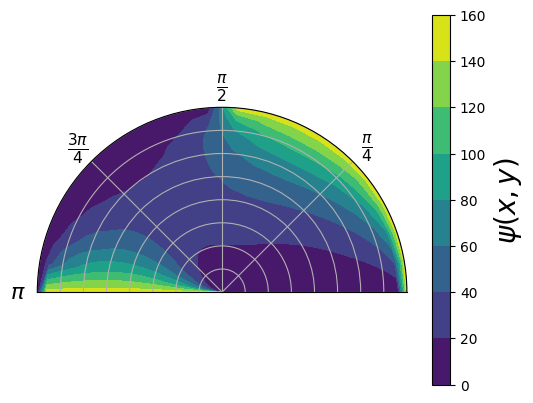

In [317]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(th, r, psi, cmap='viridis')
plt.colorbar(ctf).set_label(label=r'$\psi(x,y)$',size=20)
plt.axis([0,np.pi,0,4])
angle_ticks = np.linspace(0, np.pi, 5) 
ax.set_xticks(angle_ticks)
angle_labels = ['', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']
ax.set_xticklabels(angle_labels, fontsize=16)
plt.show()

In [318]:
#1. Constantes de la Malla
Nr = 40 # Número de puntos en el radio
Nth = 40 # Número de puntos en el ángulo
r_max = 4
th_max = np.pi

# 2. Crear los Ejes y la Malla
r = np.linspace(0,r_max,Nr)
th = np.linspace(0,th_max,Nth)
dr = r[1] - r[0]  # Distancia entre puntos de radio
dth = th[1] - th[0] # Distancia entre puntos de ángulo

# Creamos la malla. R y TH tendrán forma (Nr, Nth)
# R contendrá el radio de cada punto, TH el ángulo.
R, TH = np.meshgrid(r, th)

# 3. Inicializar la Solución
# Creamos la matriz psi con la misma forma que la malla
psi = np.zeros((Nr, Nth))

# 4. Aplicar las Condiciones de Frontera
# ψ(r, θ = 0) = 0
psi[:, 0] = 0

# ψ(r, θ = π) = 150
#psi[:, -1] = 150

# ψ(r = 4, θ) para la primera mitad de los ángulos es 150
#mid_th = Nth // 2
#psi[-1, 0:mid_th] = 150

# ψ(r = 4, θ) para la segunda mitad de los ángulos es 0
#psi[-1, mid_th:] = 0

psi[-1, :] = 150 * np.sin(th)

In [319]:
# Definimos cuántas veces queremos repetir el proceso
num_iterations = 1000 

# El bucle principal de iteración
for k in range(num_iterations):
    # 1. Hacemos una copia de la matriz actual para leer los valores de los vecinos.
    #    Esto es CRUCIAL para la estabilidad del método.
    psi_copy = psi.copy()

    # 2. Recorremos cada punto INTERIOR de la malla.
    #    - Empezamos i en 1 para evitar la singularidad en r=0.
    #    - Terminamos en Nr-1 y Nth-1 para no tocar las fronteras.
    for i in range(1, Nr - 1):
        for j in range(1, Nth - 1):
            
            # El radio 'r' en la fórmula es el radio en el punto (i, j)
            r_ij = R[i, j]
            
            g_numerador = (( (1/(dr**2)) + 1/(r_ij*dr) ) * psi_copy[i+1, j]
            + ( 1/(dr**2) ) * psi_copy[i-1,j]
            + ( 1/((r_ij**2) * (dth**2)) ) * (psi_copy[i, j+1] + psi_copy[i, j-1]))

            
            denominador = ( 2/(dr**2) + 1/(r_ij * dr) + 2/(r_ij**2 * dth**2) )

            psi[i, j] = g_numerador / denominador

print("¡Cálculo completado!")

¡Cálculo completado!


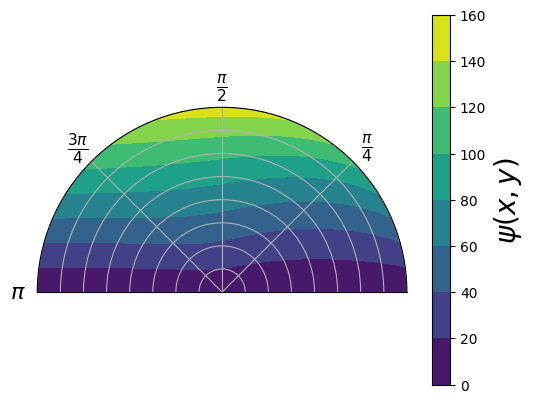

In [320]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(th, r, psi, cmap='viridis')
plt.colorbar(ctf).set_label(label=r'$\psi(x,y)$',size=20)
plt.axis([0,np.pi,0,4])
angle_ticks = np.linspace(0, np.pi, 5) 
ax.set_xticks(angle_ticks)
angle_labels = ['', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$', r'$\pi$']
ax.set_xticklabels(angle_labels, fontsize=16)
plt.show()